In [1]:
import os

import numpy as np

os.getcwd()  # pour afficher le chemin de travail actuel
os.chdir('/home/batman/Documents/Picsellia/picsellia_repos/picsellia-training-engine/labelfix-vs-vlms/labelfix')

In [2]:
import tensorflow as tf

In [3]:
from labelfix.src.labelfix import check_dataset
from labelfix.src.utils.visualize import visualize_image

Using TensorFlow backend.
2024-03-14 15:23:41.856067: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-03-14 15:23:41.863555: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2688000000 Hz
2024-03-14 15:23:41.864785: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x59aecb959c10 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-03-14 15:23:41.864794: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-03-14 15:23:41.870137: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2024-03-14 15:23:41.929808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
20

In [4]:
from picsellia import Client
from dataset_organizer import DatasetOrganizer

In [5]:
api_token = ""
organization_name = ""
host = "https://app.picsellia.com"
dataset_version_id = "018d0dab-e56b-7c04-bf9c-cfb6e7f45fc8"
client = Client(api_token=api_token, organization_name=organization_name, host=host)
dataset_version = client.get_dataset_version_by_id(dataset_version_id)

Hi SoniaGrh, welcome back. 🥑
Workspace: your organization.


In [7]:
dataset_version.download(target_path=os.path.join(dataset_version.name, dataset_version.version), use_id=True)

100%|█████████████████████████████████████████████████████████████| 452/452 [00:08<00:00, 52.08it/s]

0 assets downloaded (over 452) in directory Clothes_recognition/test
Assets of Version 'test' of dataset Clothes_recognition  (id: 018d0dab-e56b-7c04-bf9c-cfb6e7f45fc8) downloaded into Clothes_recognition/test


In [8]:
coco_file = dataset_version.build_coco_file_locally(use_id=True)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.62it/s]


In [9]:
converter = DatasetOrganizer(
        coco_file,
        os.path.join(dataset_version.name, dataset_version.version),
        os.path.join(dataset_version.name, f"{dataset_version.version}_organized"),
    )
converter.organize()

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [11]:
dataset = datagen.flow_from_directory(
    os.path.join(dataset_version.name, f"{dataset_version.version}_organized"),
    target_size=(224, 224),
    batch_size=452,
    class_mode="binary",
    shuffle=True,
)

Found 452 images belonging to 20 classes.


In [12]:
dataset.class_indices.keys()

dict_keys(['Blazer', 'Blouse', 'Body', 'Dress', 'Hat', 'Hoodie', 'Longsleeve', 'Not_sure', 'Other', 'Outwear', 'Pants', 'Polo', 'Shirt', 'Shoes', 'Shorts', 'Skip', 'Skirt', 'T-Shirt', 'Top', 'Undershirt'])

In [13]:
X_train, y_train = next(dataset)
X_train = X_train / 255
y_train = y_train.astype(int)

In [14]:
os.listdir("Clothes_recognition/test_organized")

['Other',
 'Hoodie',
 'Top',
 'T-Shirt',
 'Not_sure',
 'Blazer',
 'Shorts',
 'Skirt',
 'Shoes',
 'Undershirt',
 'Outwear',
 'Blouse',
 'Pants',
 'Skip',
 'Dress',
 'Polo',
 'Shirt',
 'Longsleeve',
 'Body',
 'Hat']


Dataset statistics:
Shape of X: (452, 224, 224, 3), shape of y: (452,)
Distribution of labels: y.max_count / y.min_count: 80.0 

Assuming image input since data has dimensionality 4.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 48)      624       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 223, 223, 48)      9264      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 96)        18528     
_________________________________________________________________
conv2d_4 (Conv2D)       

2024-03-14 15:23:59.679267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-14 15:23:59.679399: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3050 Ti Laptop GPU major: 8 minor: 6 memoryClockRate(GHz): 1.035
pciBusID: 0000:01:00.0
2024-03-14 15:23:59.679510: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory
2024-03-14 15:23:59.679587: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcublas.so.10.0'; dlerror: libcublas.so.10.0: cannot open shared object file: No such file or directory
2024-03-14 15:23:59.679617: W tensorflow/stream_executor/platform/default/dso_loader.cc:5

Figure saved to /home/batman/Documents/Picsellia/picsellia_repos/picsellia-training-engine/labelfix-vs-vlms/labelfix/Clothes_recognition/results/0.png


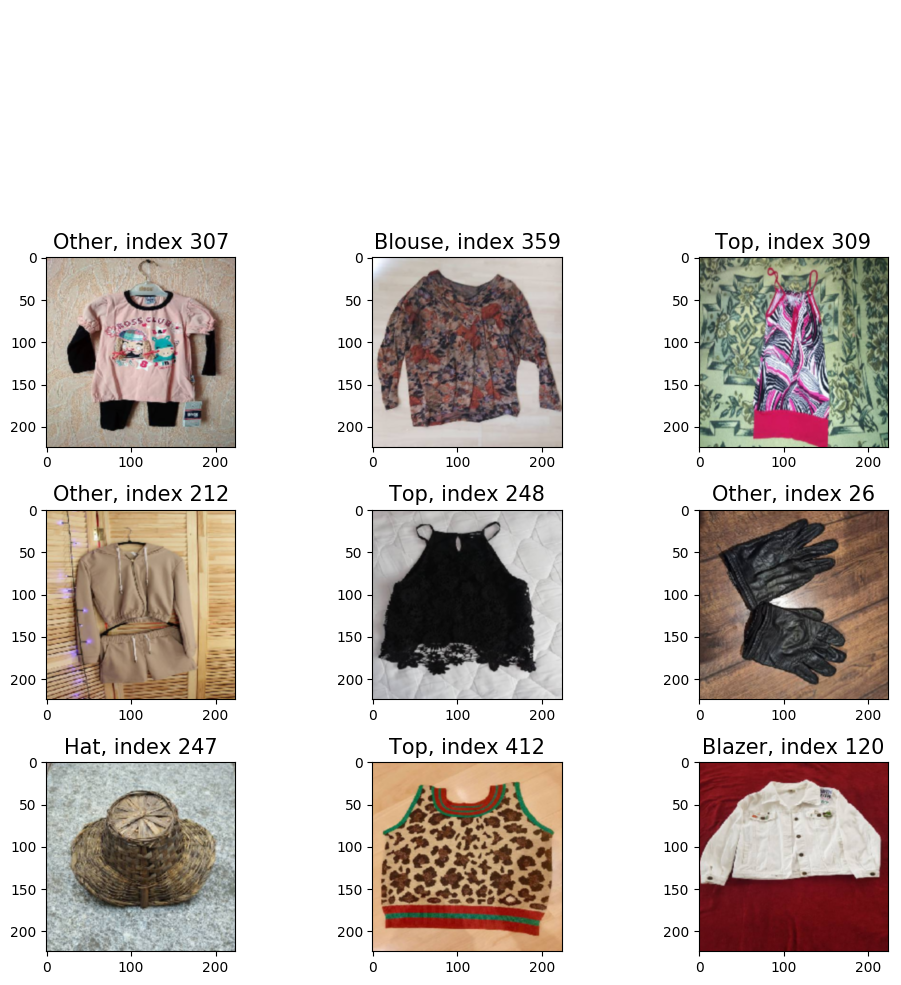

Figure saved to /home/batman/Documents/Picsellia/picsellia_repos/picsellia-training-engine/labelfix-vs-vlms/labelfix/Clothes_recognition/results/1.png


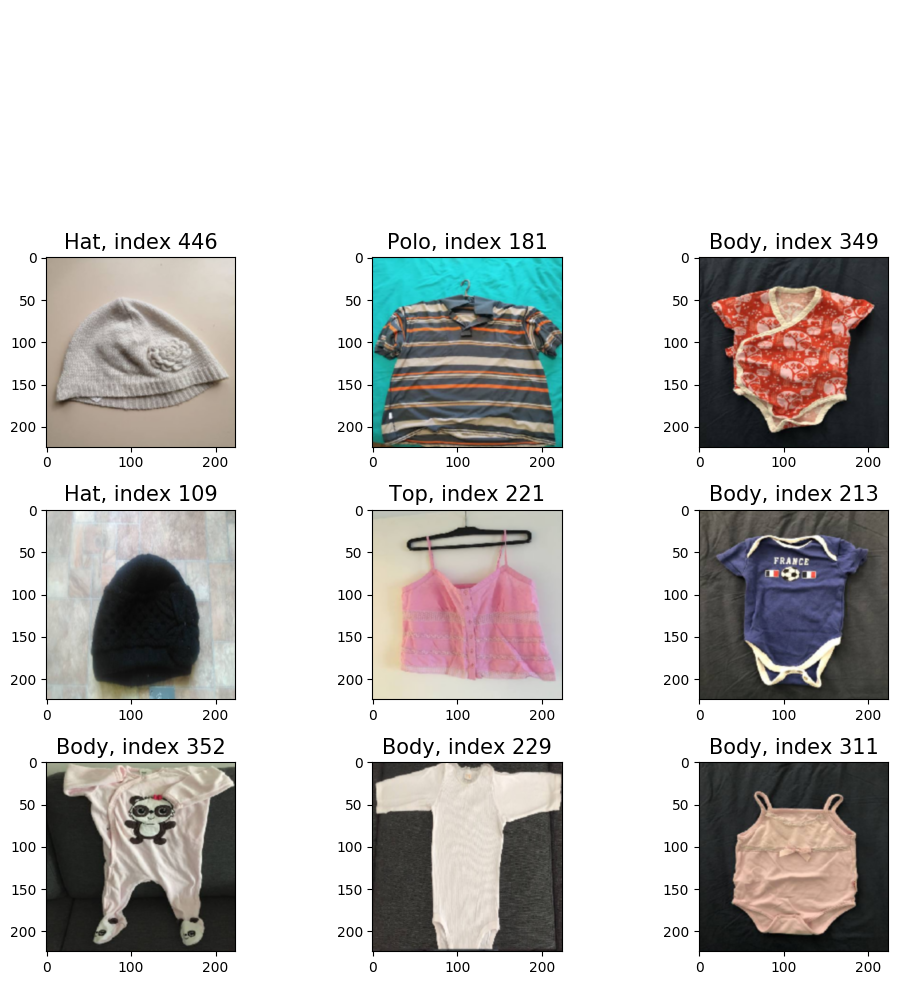

Figure saved to /home/batman/Documents/Picsellia/picsellia_repos/picsellia-training-engine/labelfix-vs-vlms/labelfix/Clothes_recognition/results/2.png


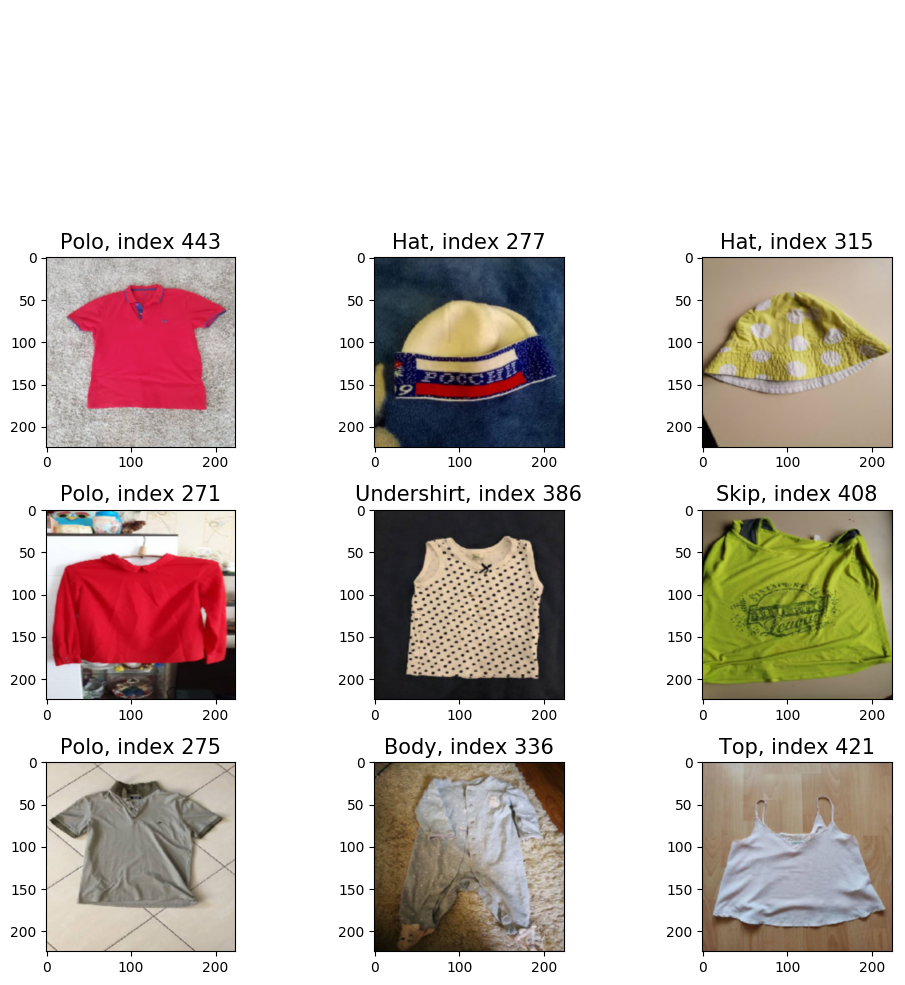

Figure saved to /home/batman/Documents/Picsellia/picsellia_repos/picsellia-training-engine/labelfix-vs-vlms/labelfix/Clothes_recognition/results/3.png


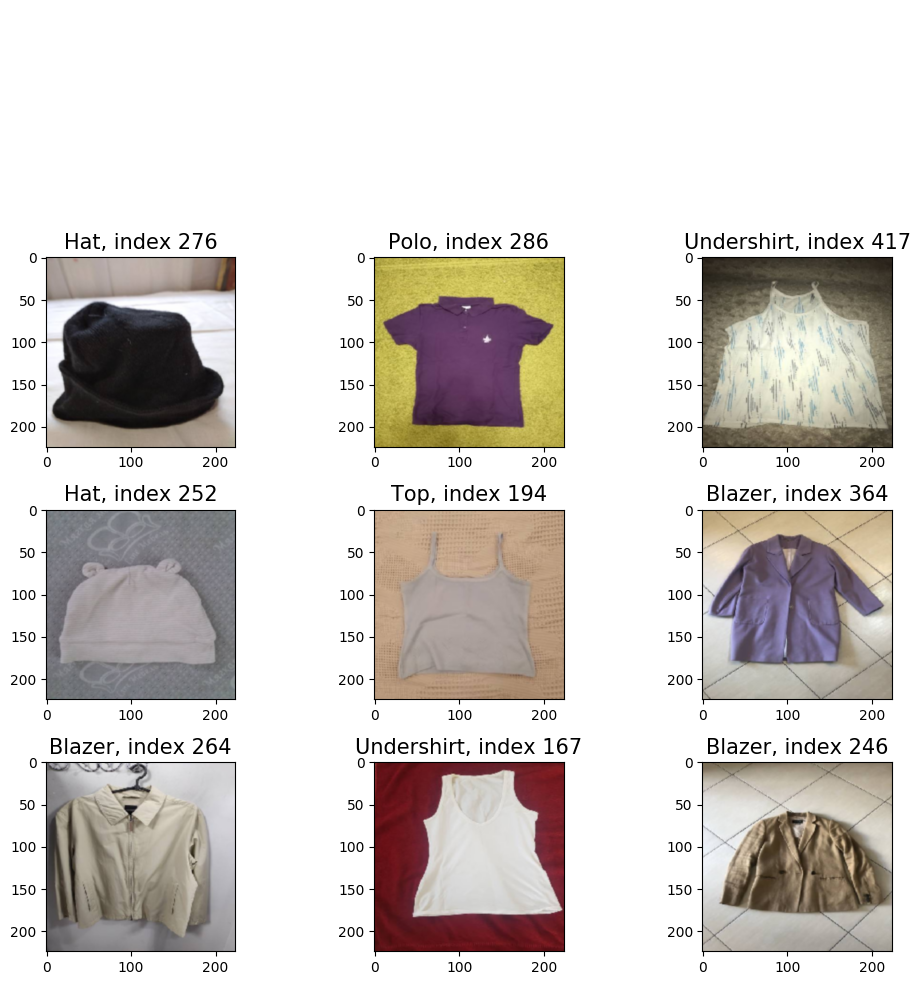

In [15]:
res = check_dataset(X=X_train, y=y_train)

# plot four sets of images with the most likely mislabeled pairs (x, y) and save to disk
for i in range(4):
    visualize_image(image_data=X_train,
                    image_labels=y_train,
                    label_names=list(dataset.class_indices.keys()),
                    indices=res["indices"],
                    batch_to_plot=i,
                    save_to_path="/home/batman/Documents/Picsellia/picsellia_repos/picsellia-training-engine/labelfix-vs-vlms/labelfix/Clothes_recognition/results",)

In [17]:
dataset_version.list_labels()

[Label 'Other' (id: 018d0dac-aee1-7be9-9c92-2cba5dc6718f),
 Label 'Longsleeve' (id: 018d0dac-aee1-784e-b6b1-9e4da1c03a97),
 Label 'Hoodie' (id: 018d0dac-aee2-71e3-a4d6-8395eb2a6748),
 Label 'Dress' (id: 018d0dac-aee2-730c-9d25-9aa2af0d87ee),
 Label 'Shorts' (id: 018d0dac-aee2-722d-9466-38c6cd5b552f),
 Label 'Shirt' (id: 018d0dac-aee2-7df9-9256-3bcffd9eec1a),
 Label 'Skip' (id: 018d0dac-aee2-7343-a34c-16647d3e39b2),
 Label 'Shoes' (id: 018d0dac-aee2-742a-9a33-7178a6781e03),
 Label 'Pants' (id: 018d0dac-aee2-77bc-84c9-c2182bded2ad),
 Label 'Not_sure' (id: 018d0dac-aee2-7737-82d8-e63ef5017240),
 Label 'Top' (id: 018d0dac-aee2-7574-b7d3-6c4428c55b2b),
 Label 'T-Shirt' (id: 018d0dac-aee2-7bbe-977d-59ec510f6465),
 Label 'Undershirt' (id: 018d0dac-aee2-799f-a04d-30fcac4a5702),
 Label 'Polo' (id: 018d0dac-aee2-7938-927b-629486c21ffb),
 Label 'Blazer' (id: 018d0dac-aee2-73f0-b7ae-42fa85e967eb),
 Label 'Blouse' (id: 018d0dac-aee2-77c0-ae07-d9277115558b),
 Label 'Skirt' (id: 018d0dac-aee2-7d0d-9c